# Regresión lineal simple
---

***Tenga en cuenta que este script es una guía para ayudar en la resolución de los ejercicios. Las consignas, incisos, datasets, tablas, parámetros y/o demás valores utilizados pueden no coincidir con los de la práctica.***

**Montar la carpeta de Google Drive y definir constantes para trabajar**

In [ ]:
MNT_DRIVE_DIR = '/content/drive/'
DRIVE_DIR = '/content/drive/MyDrive/'
DATOS_DIR = DRIVE_DIR + 'Colab Notebooks/Datos/'
FUENTES_DIR = DRIVE_DIR + 'Colab Notebooks/Fuentes'

from google.colab import drive
drive.mount(MNT_DRIVE_DIR)

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

Mounted at /content/drive/


#    Variantes del Descenso del Gradiente
**Descenso del Gradiente por Lotes (Batch Gradient Descent):**

* Calcula el gradiente utilizando todo el conjunto de datos en cada época.
* Ajusta los pesos una vez por época en función del gradiente global promedio.
* Adecuado para conjuntos de datos pequeños o medianos, pero costoso en conjuntos de datos grandes.

**Descenso de Gradiente Estocástico (Stocastic Gradient Descent):**

* Calcula el gradiente utilizando un solo ejemplo a la vez en cada iteración.
* Ajusta los pesos después de cada ejemplo.
* Converge más rápido, especialmente en conjuntos de datos grandes, pero con mayor variabilidad en la dirección del gradiente debido a la estocasticidad.

**Descenso del Gradiente por Mini-lotes (Mini-Batch Gradient Descent):**

* Calcula el gradiente utilizando un mini-lote (un pequeño subconjunto de ejemplos) en cada iteración.
* Ajusta los pesos después de cada mini-lote.
* Equilibra la eficiencia y la estabilidad del gradiente, utilizado comúnmente en prácticas de entrenamiento.

---

**Error Cuadrático Medio  (Mean Square Error)**
$$
MSE = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 \\
$$


Donde:

- $MSE$ es el Error Cuadrático Medio.
- $m$ es el número de observaciones o ejemplos del conjunto de datos.
- $y_i$ es el valor real (que se quiere predecir) del ejemplo $i$.
- $\hat{y}_i$ es la predicción del modelo para el ejemplo $i$.




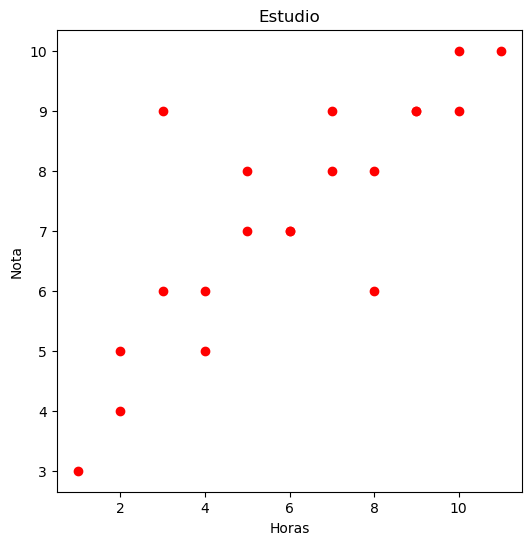

array([[1.        , 0.81072217],
       [0.81072217, 1.        ]])

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import meshgrid #,imshow,contour
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


# Valores para "Horas de Estudio" (en horas)
horas_estudio = [2, 3, 4, 5, 6, 7, 8, 9, 10, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 11]

# Valores para "Nota" (en una escala de 0 a 10, correlacionados positivamente)
nota_materia = [5, 6, 6, 7, 7, 8, 8, 9, 9, 4, 9, 5, 8, 7, 9, 6, 9, 10, 3, 10]

X = np.array(horas_estudio)
Y = np.array(nota_materia)

# grafica para ver correlación
plt.figure(figsize=(6,6))
plt.plot(X, Y,'o', color='red')
plt.title('Estudio')
plt.xlabel('Horas')
plt.ylabel('Nota')
plt.show()

np.corrcoef(X, Y)

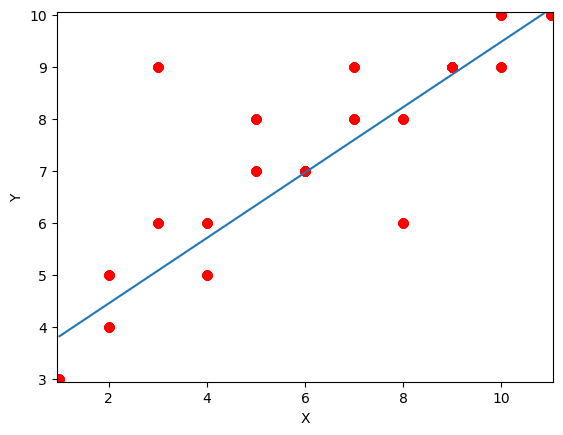

w = 0.6287697830862246
b = 3.195202330317859
Errores:
  0 => 153.512026
  1 => 80.166045
  2 => 78.229757
  3 => 76.448579
  4 => 74.733937
  5 => 73.083092
  6 => 71.493658
  7 => 69.963340
  8 => 68.489930
  9 => 67.071300
 10 => 65.705403
 11 => 64.390270
 12 => 63.124005
 13 => 61.904781
 14 => 60.730841
 15 => 59.600496
 16 => 58.512116
 17 => 57.464135
 18 => 56.455044
 19 => 55.483393
 20 => 54.547783
 21 => 53.646869
 22 => 52.779358
 23 => 51.944001
 24 => 51.139601
 25 => 50.365002
 26 => 49.619093
 27 => 48.900803
 28 => 48.209104
 29 => 47.543003
 30 => 46.901547
 31 => 46.283816
 32 => 45.688928
 33 => 45.116030
 34 => 44.564304
 35 => 44.032960
 36 => 43.521241
 37 => 43.028414
 38 => 42.553777
 39 => 42.096653
 40 => 41.656389
 41 => 41.232359
 42 => 40.823958
 43 => 40.430605
 44 => 40.051741
 45 => 39.686826
 46 => 39.335343
 47 => 38.996791
 48 => 38.670690
 49 => 38.356578
 50 => 38.054009
 51 => 37.762555
 52 => 37.481802
 53 => 37.211354
 54 => 36.950828
 55 => 36.

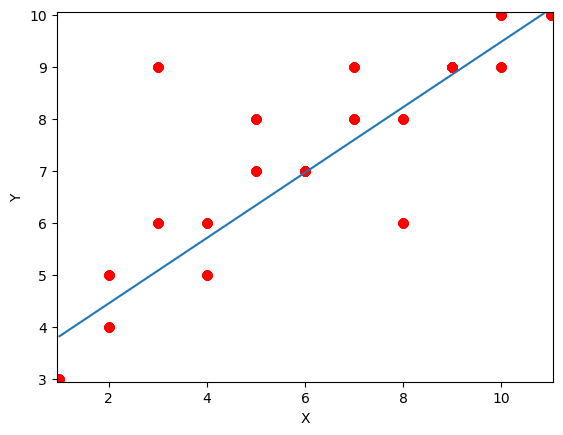

In [5]:
from ClassNeuronaLineal import NeuronaLineal

print('X',X)
x_train = X.reshape(-1,1)    # selecciona entradas y formatea a Nx1
y_train = Y.reshape(-1,1)    # selecciona salidas y formatea a Nx1
print('x_train', x_train)
# entrena neurona lineal y grafica
modelo = NeuronaLineal(alpha=0.005, n_iter=500, cotaE=0.1, draw=1, title=['X', 'Y'])
modelo = modelo.fit(x_train, y_train)
print('w =', modelo.w_[0])
print('b =', modelo.b_[0])

# imprime errores de cada iteracion:
print('Errores:')
for i, err in enumerate(modelo.errors_):
    print('%3d => %f' % (i, err[0]))


dato = 9 # horas de estudio dedicadas
print('Quien dedicó %d horas de estudio sacará un %d como nota en el examen' % (dato, modelo.predict([dato])[0]))   # prediccion

In [ ]:
# prueba con pesos de otro entrenamiento
#w = 0.6281767157431366
#b = 3.2010171504435605
modelo.w_ = [0.63]
modelo.b_ = [3.20]

for i in range(1, 12):
    dato = i # horas de estudio dedicadas
    print('Quien dedicó %2d horas de estudio sacará un %2d como nota en el examen' % (dato, modelo.predict([dato])[0]))   # prediccion

Quien dedicó  1 horas de estudio sacará un  3 como nota en el examen
Quien dedicó  2 horas de estudio sacará un  4 como nota en el examen
Quien dedicó  3 horas de estudio sacará un  5 como nota en el examen
Quien dedicó  4 horas de estudio sacará un  5 como nota en el examen
Quien dedicó  5 horas de estudio sacará un  6 como nota en el examen
Quien dedicó  6 horas de estudio sacará un  6 como nota en el examen
Quien dedicó  7 horas de estudio sacará un  7 como nota en el examen
Quien dedicó  8 horas de estudio sacará un  8 como nota en el examen
Quien dedicó  9 horas de estudio sacará un  8 como nota en el examen
Quien dedicó 10 horas de estudio sacará un  9 como nota en el examen
Quien dedicó 11 horas de estudio sacará un 10 como nota en el examen
